# Esempio 2: Ottimizzazione Rete Logistica

## Ricerca Operativa - Problema di Trasporto

**Obiettivo**: Risolvere un classico problema di trasporto (transportation problem) minimizzando i costi di distribuzione.

---

## üìã Descrizione del Problema

Un'azienda ha **3 stabilimenti produttivi** e deve rifornire **4 centri distributivi**.

### Capacit√† produttive degli stabilimenti (unit√†/mese):
- **Stabilimento 1**: 200 unit√†
- **Stabilimento 2**: 300 unit√†
- **Stabilimento 3**: 250 unit√†

**Capacit√† totale**: 750 unit√†/mese

### Domande dei centri distributivi (unit√†/mese):
- **Centro A**: 150 unit√†
- **Centro B**: 200 unit√†
- **Centro C**: 180 unit√†
- **Centro D**: 170 unit√†

**Domanda totale**: 700 unit√†/mese

### Costi di trasporto (‚Ç¨/unit√†):

|           | Centro A | Centro B | Centro C | Centro D |
|-----------|----------|----------|----------|----------|
| Stab. 1   | 8        | 6        | 10       | 9        |
| Stab. 2   | 9        | 12       | 7        | 8        |
| Stab. 3   | 14       | 9        | 11       | 5        |

### Obiettivo:
Determinare **quanto spedire da ciascuno stabilimento a ciascun centro** per **minimizzare i costi totali di trasporto**.

### Nota:
Poich√© l'offerta (750) > domanda (700), il problema ha sicuramente una soluzione ammissibile.

## üìê Modello Matematico

### Insiemi:
- $I = \{1, 2, 3\}$ = insieme degli stabilimenti
- $J = \{A, B, C, D\}$ = insieme dei centri distributivi

### Parametri:
- $b_i$ = capacit√† dello stabilimento $i$ (unit√†/mese)
- $d_j$ = domanda del centro $j$ (unit√†/mese)
- $c_{ij}$ = costo di trasporto da stabilimento $i$ a centro $j$ (‚Ç¨/unit√†)

### Variabili decisionali:
- $x_{ij}$ = quantit√† trasportata dallo stabilimento $i$ al centro $j$

### Funzione obiettivo:
$$\min z = \sum_{i \in I} \sum_{j \in J} c_{ij} x_{ij}$$

### Vincoli:
$$
\begin{align}
\sum_{j \in J} x_{ij} &\leq b_i \quad \forall i \in I \quad &\text{(capacit√† stabilimenti)} \\
\sum_{i \in I} x_{ij} &= d_j \quad \forall j \in J \quad &\text{(domanda centri)} \\
x_{ij} &\geq 0 \quad \forall i \in I, j \in J \quad &\text{(non negativit√†)}
\end{align}
$$

## üíª Implementazione in Gurobi

### Step 1: Import e Setup

In [1]:
# Import delle librerie necessarie
import gurobipy as gp
from gurobipy import GRB
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.patches import FancyBboxPatch

%matplotlib inline

print("Librerie importate con successo!")
print(f"Versione Gurobi: {gp.gurobi.version()}")

Librerie importate con successo!
Versione Gurobi: (12, 0, 3)


### Step 2: Definizione dei Dati del Problema

In [2]:
# Insiemi
stabilimenti = [1, 2, 3]
centri = ['A', 'B', 'C', 'D']

# Capacit√† degli stabilimenti (unit√†/mese)
capacita = {
    1: 200,
    2: 300,
    3: 250
}

# Domanda dei centri distributivi (unit√†/mese)
domanda = {
    'A': 150,
    'B': 200,
    'C': 180,
    'D': 170
}

# Costi di trasporto (‚Ç¨/unit√†)
# costo[i][j] = costo per trasportare da stabilimento i a centro j
costo = {
    1: {'A': 8,  'B': 6,  'C': 10, 'D': 9},
    2: {'A': 9,  'B': 12, 'C': 7,  'D': 8},
    3: {'A': 14, 'B': 9,  'C': 11, 'D': 5}
}

# Verifica bilanciamento
offerta_totale = sum(capacita.values())
domanda_totale = sum(domanda.values())

print("\n=== DATI DEL PROBLEMA ===")
print(f"\nOfferta totale: {offerta_totale} unit√†/mese")
print(f"Domanda totale: {domanda_totale} unit√†/mese")
print(f"Eccesso di capacit√†: {offerta_totale - domanda_totale} unit√†/mese")
print(f"\n‚úì Il problema √® BILANCIATO (offerta ‚â• domanda)")


=== DATI DEL PROBLEMA ===

Offerta totale: 750 unit√†/mese
Domanda totale: 700 unit√†/mese
Eccesso di capacit√†: 50 unit√†/mese

‚úì Il problema √® BILANCIATO (offerta ‚â• domanda)


In [3]:
# Visualizzazione tabellare dei dati
print("\n=== CAPACIT√Ä STABILIMENTI ===")
df_capacita = pd.DataFrame([
    {'Stabilimento': f'Stab. {i}', 'Capacit√† (unit√†/mese)': capacita[i]} 
    for i in stabilimenti
])
print(df_capacita.to_string(index=False))

print("\n=== DOMANDA CENTRI DISTRIBUTIVI ===")
df_domanda = pd.DataFrame([
    {'Centro': f'Centro {j}', 'Domanda (unit√†/mese)': domanda[j]} 
    for j in centri
])
print(df_domanda.to_string(index=False))

print("\n=== MATRICE COSTI DI TRASPORTO (‚Ç¨/unit√†) ===")
df_costi = pd.DataFrame(costo).T
df_costi.index = [f'Stab. {i}' for i in stabilimenti]
df_costi.columns = [f'Centro {j}' for j in centri]
print(df_costi)


=== CAPACIT√Ä STABILIMENTI ===
Stabilimento  Capacit√† (unit√†/mese)
     Stab. 1                    200
     Stab. 2                    300
     Stab. 3                    250

=== DOMANDA CENTRI DISTRIBUTIVI ===
  Centro  Domanda (unit√†/mese)
Centro A                   150
Centro B                   200
Centro C                   180
Centro D                   170

=== MATRICE COSTI DI TRASPORTO (‚Ç¨/unit√†) ===
         Centro A  Centro B  Centro C  Centro D
Stab. 1         8         6        10         9
Stab. 2         9        12         7         8
Stab. 3        14         9        11         5


### Step 3: Creazione del Modello Gurobi

In [4]:
# Creiamo il modello
modello = gp.Model("Rete_Logistica")

# Opzionale: output silenzioso
modello.Params.OutputFlag = 0

print("Modello creato con successo!")

Set parameter Username
Set parameter LicenseID to value 2704465
Academic license - for non-commercial use only - expires 2026-09-08
Modello creato con successo!


### Step 4: Definizione delle Variabili Decisionali

Creiamo una variabile $x_{ij}$ per ogni coppia (stabilimento, centro).

In [5]:
# Creiamo le variabili decisionali
# x[i,j] = quantit√† trasportata dallo stabilimento i al centro j

x = {}
for i in stabilimenti:
    for j in centri:
        x[i, j] = modello.addVar(
            lb=0,                          # lower bound
            vtype=GRB.CONTINUOUS,          # variabile continua
            name=f"x_{i}_{j}"              # nome della variabile
        )

modello.update()

print("\n=== VARIABILI DECISIONALI DEFINITE ===")
print(f"Numero totale di variabili: {len(stabilimenti) * len(centri)}")
print("\nEsempi:")
print("  x_1_A: quantit√† da Stabilimento 1 a Centro A")
print("  x_2_B: quantit√† da Stabilimento 2 a Centro B")
print("  x_3_D: quantit√† da Stabilimento 3 a Centro D")


=== VARIABILI DECISIONALI DEFINITE ===
Numero totale di variabili: 12

Esempi:
  x_1_A: quantit√† da Stabilimento 1 a Centro A
  x_2_B: quantit√† da Stabilimento 2 a Centro B
  x_3_D: quantit√† da Stabilimento 3 a Centro D


### Step 5: Definizione della Funzione Obiettivo

Vogliamo **minimizzare** il costo totale di trasporto.

In [6]:
# Funzione obiettivo: minimizzare i costi totali di trasporto
# Somma di tutti i costi: sum_i sum_j (c_ij * x_ij)

funzione_obiettivo = gp.quicksum(
    costo[i][j] * x[i, j] 
    for i in stabilimenti 
    for j in centri
)

modello.setObjective(funzione_obiettivo, GRB.MINIMIZE)

print("\n=== FUNZIONE OBIETTIVO ===")
print("Minimizza: Œ£ Œ£ c_ij * x_ij")
print("\nCosto totale di trasporto da minimizzare")


=== FUNZIONE OBIETTIVO ===
Minimizza: Œ£ Œ£ c_ij * x_ij

Costo totale di trasporto da minimizzare


### Step 6: Aggiunta dei Vincoli

Aggiungiamo due tipi di vincoli:
1. **Vincoli di capacit√†** degli stabilimenti
2. **Vincoli di domanda** dei centri distributivi

In [7]:
# VINCOLI DI CAPACIT√Ä DEGLI STABILIMENTI
# Ogni stabilimento i non pu√≤ spedire pi√π della sua capacit√†
# sum_j x_ij <= b_i  per ogni i

vincoli_capacita = {}
for i in stabilimenti:
    vincoli_capacita[i] = modello.addConstr(
        gp.quicksum(x[i, j] for j in centri) <= capacita[i],
        name=f"Capacita_Stab_{i}"
    )

print("\n=== VINCOLI DI CAPACIT√Ä AGGIUNTI ===")
for i in stabilimenti:
    print(f"Stabilimento {i}: Œ£ x_{i}_j ‚â§ {capacita[i]}")


=== VINCOLI DI CAPACIT√Ä AGGIUNTI ===
Stabilimento 1: Œ£ x_1_j ‚â§ 200
Stabilimento 2: Œ£ x_2_j ‚â§ 300
Stabilimento 3: Œ£ x_3_j ‚â§ 250


In [8]:
# VINCOLI DI DOMANDA DEI CENTRI
# Ogni centro j deve ricevere esattamente la sua domanda
# sum_i x_ij = d_j  per ogni j

vincoli_domanda = {}
for j in centri:
    vincoli_domanda[j] = modello.addConstr(
        gp.quicksum(x[i, j] for i in stabilimenti) == domanda[j],
        name=f"Domanda_Centro_{j}"
    )

modello.update()

print("\n=== VINCOLI DI DOMANDA AGGIUNTI ===")
for j in centri:
    print(f"Centro {j}: Œ£ x_i_{j} = {domanda[j]}")

print("\n‚úì Tutti i vincoli sono stati aggiunti al modello")


=== VINCOLI DI DOMANDA AGGIUNTI ===
Centro A: Œ£ x_i_A = 150
Centro B: Œ£ x_i_B = 200
Centro C: Œ£ x_i_C = 180
Centro D: Œ£ x_i_D = 170

‚úì Tutti i vincoli sono stati aggiunti al modello


### Step 7: Riepilogo del Modello

In [9]:
print("\n=== RIEPILOGO MODELLO ===")
print(f"Variabili: {modello.NumVars}")
print(f"Vincoli: {modello.NumConstrs}")
print(f"  - Vincoli di capacit√†: {len(stabilimenti)}")
print(f"  - Vincoli di domanda: {len(centri)}")
print(f"Tipo di modello: Programmazione Lineare (LP)")


=== RIEPILOGO MODELLO ===
Variabili: 12
Vincoli: 7
  - Vincoli di capacit√†: 3
  - Vincoli di domanda: 4
Tipo di modello: Programmazione Lineare (LP)


## üöÄ Risoluzione del Modello

In [10]:
# Risolviamo il modello
print("\n=== RISOLUZIONE IN CORSO ===")
print("Sto ottimizzando la rete logistica...\n")

modello.optimize()

# Controlliamo lo stato della soluzione
if modello.status == GRB.OPTIMAL:
    print("‚úÖ SOLUZIONE OTTIMA TROVATA!")
elif modello.status == GRB.INFEASIBLE:
    print("‚ùå Il modello √® INAMMISSIBILE")
elif modello.status == GRB.UNBOUNDED:
    print("‚ö†Ô∏è Il modello √® ILLIMITATO")
else:
    print(f"‚ö†Ô∏è Status: {modello.status}")


=== RISOLUZIONE IN CORSO ===
Sto ottimizzando la rete logistica...

‚úÖ SOLUZIONE OTTIMA TROVATA!


## üìä Risultati della Soluzione Ottima

In [11]:
if modello.status == GRB.OPTIMAL:
    print("\n" + "="*70)
    print("                    PIANO DI DISTRIBUZIONE OTTIMALE")
    print("="*70)
    
    # Salviamo la soluzione
    soluzione = {}
    for i in stabilimenti:
        for j in centri:
            soluzione[i, j] = x[i, j].X
    
    # Costo totale
    costo_totale = modello.ObjVal
    print(f"\nüí∞ COSTO TOTALE DI TRASPORTO: {costo_totale:,.2f} ‚Ç¨/mese")
    print("="*70)
    
    # Matrice delle spedizioni
    print("\nüì¶ QUANTIT√Ä DA SPEDIRE (unit√†/mese):\n")
    
    # Creiamo un DataFrame per visualizzare meglio
    df_soluzione = pd.DataFrame(
        [[soluzione[i, j] for j in centri] for i in stabilimenti],
        index=[f'Stab. {i}' for i in stabilimenti],
        columns=[f'Centro {j}' for j in centri]
    )
    
    # Aggiungiamo una colonna con i totali spediti
    df_soluzione['TOTALE SPEDITO'] = df_soluzione.sum(axis=1)
    
    # Aggiungiamo una riga con i totali ricevuti
    totali_ricevuti = df_soluzione.iloc[:, :-1].sum(axis=0)
    totali_ricevuti['TOTALE SPEDITO'] = df_soluzione['TOTALE SPEDITO'].sum()
    df_soluzione.loc['TOTALE RICEVUTO'] = totali_ricevuti
    
    print(df_soluzione.to_string())
    
    print("\n" + "="*70)


                    PIANO DI DISTRIBUZIONE OTTIMALE

üí∞ COSTO TOTALE DI TRASPORTO: 4,720.00 ‚Ç¨/mese

üì¶ QUANTIT√Ä DA SPEDIRE (unit√†/mese):

                 Centro A  Centro B  Centro C  Centro D  TOTALE SPEDITO
Stab. 1              30.0     170.0       0.0       0.0           200.0
Stab. 2             120.0       0.0     180.0       0.0           300.0
Stab. 3               0.0      30.0       0.0     170.0           200.0
TOTALE RICEVUTO     150.0     200.0     180.0     170.0           700.0



In [12]:
if modello.status == GRB.OPTIMAL:
    # Analisi dettagliata per stabilimento
    print("\nüè≠ ANALISI PER STABILIMENTO:")
    print("-" * 70)
    
    for i in stabilimenti:
        quantita_spedita = sum(soluzione[i, j] for j in centri)
        capacita_inutilizzata = capacita[i] - quantita_spedita
        percentuale_utilizzo = (quantita_spedita / capacita[i]) * 100
        
        print(f"\nStabilimento {i}:")
        print(f"  Capacit√†: {capacita[i]} unit√†")
        print(f"  Spedito: {quantita_spedita:.2f} unit√† ({percentuale_utilizzo:.1f}%)")
        print(f"  Capacit√† residua: {capacita_inutilizzata:.2f} unit√†")
        
        # Destinazioni principali
        spedizioni = [(j, soluzione[i, j]) for j in centri if soluzione[i, j] > 0.1]
        if spedizioni:
            print(f"  Spedisce verso:")
            for j, qty in sorted(spedizioni, key=lambda x: x[1], reverse=True):
                print(f"    - Centro {j}: {qty:.2f} unit√† (costo: {costo[i][j]}‚Ç¨/u)")
    
    print("\n" + "="*70)


üè≠ ANALISI PER STABILIMENTO:
----------------------------------------------------------------------

Stabilimento 1:
  Capacit√†: 200 unit√†
  Spedito: 200.00 unit√† (100.0%)
  Capacit√† residua: 0.00 unit√†
  Spedisce verso:
    - Centro B: 170.00 unit√† (costo: 6‚Ç¨/u)
    - Centro A: 30.00 unit√† (costo: 8‚Ç¨/u)

Stabilimento 2:
  Capacit√†: 300 unit√†
  Spedito: 300.00 unit√† (100.0%)
  Capacit√† residua: 0.00 unit√†
  Spedisce verso:
    - Centro C: 180.00 unit√† (costo: 7‚Ç¨/u)
    - Centro A: 120.00 unit√† (costo: 9‚Ç¨/u)

Stabilimento 3:
  Capacit√†: 250 unit√†
  Spedito: 200.00 unit√† (80.0%)
  Capacit√† residua: 50.00 unit√†
  Spedisce verso:
    - Centro D: 170.00 unit√† (costo: 5‚Ç¨/u)
    - Centro B: 30.00 unit√† (costo: 9‚Ç¨/u)



In [13]:
if modello.status == GRB.OPTIMAL:
    # Analisi dettagliata per centro distributivo
    print("\nüè™ ANALISI PER CENTRO DISTRIBUTIVO:")
    print("-" * 70)
    
    for j in centri:
        print(f"\nCentro {j}:")
        print(f"  Domanda: {domanda[j]} unit√†")
        
        # Fornitori
        forniture = [(i, soluzione[i, j]) for i in stabilimenti if soluzione[i, j] > 0.1]
        if forniture:
            print(f"  Rifornito da:")
            for i, qty in sorted(forniture, key=lambda x: x[1], reverse=True):
                percentuale = (qty / domanda[j]) * 100
                costo_totale_rotta = qty * costo[i][j]
                print(f"    - Stabilimento {i}: {qty:.2f} unit√† ({percentuale:.1f}%) - Costo: {costo_totale_rotta:.2f}‚Ç¨")
        
        # Costo medio di rifornimento
        costo_centro = sum(soluzione[i, j] * costo[i][j] for i in stabilimenti)
        costo_medio = costo_centro / domanda[j] if domanda[j] > 0 else 0
        print(f"  Costo totale rifornimento: {costo_centro:.2f}‚Ç¨")
        print(f"  Costo medio per unit√†: {costo_medio:.2f}‚Ç¨/unit√†")
    
    print("\n" + "="*70)


üè™ ANALISI PER CENTRO DISTRIBUTIVO:
----------------------------------------------------------------------

Centro A:
  Domanda: 150 unit√†
  Rifornito da:
    - Stabilimento 2: 120.00 unit√† (80.0%) - Costo: 1080.00‚Ç¨
    - Stabilimento 1: 30.00 unit√† (20.0%) - Costo: 240.00‚Ç¨
  Costo totale rifornimento: 1320.00‚Ç¨
  Costo medio per unit√†: 8.80‚Ç¨/unit√†

Centro B:
  Domanda: 200 unit√†
  Rifornito da:
    - Stabilimento 1: 170.00 unit√† (85.0%) - Costo: 1020.00‚Ç¨
    - Stabilimento 3: 30.00 unit√† (15.0%) - Costo: 270.00‚Ç¨
  Costo totale rifornimento: 1290.00‚Ç¨
  Costo medio per unit√†: 6.45‚Ç¨/unit√†

Centro C:
  Domanda: 180 unit√†
  Rifornito da:
    - Stabilimento 2: 180.00 unit√† (100.0%) - Costo: 1260.00‚Ç¨
  Costo totale rifornimento: 1260.00‚Ç¨
  Costo medio per unit√†: 7.00‚Ç¨/unit√†

Centro D:
  Domanda: 170 unit√†
  Rifornito da:
    - Stabilimento 3: 170.00 unit√† (100.0%) - Costo: 850.00‚Ç¨
  Costo totale rifornimento: 850.00‚Ç¨
  Costo medio per unit√†: 5.00‚

## üìä Grafici di Analisi

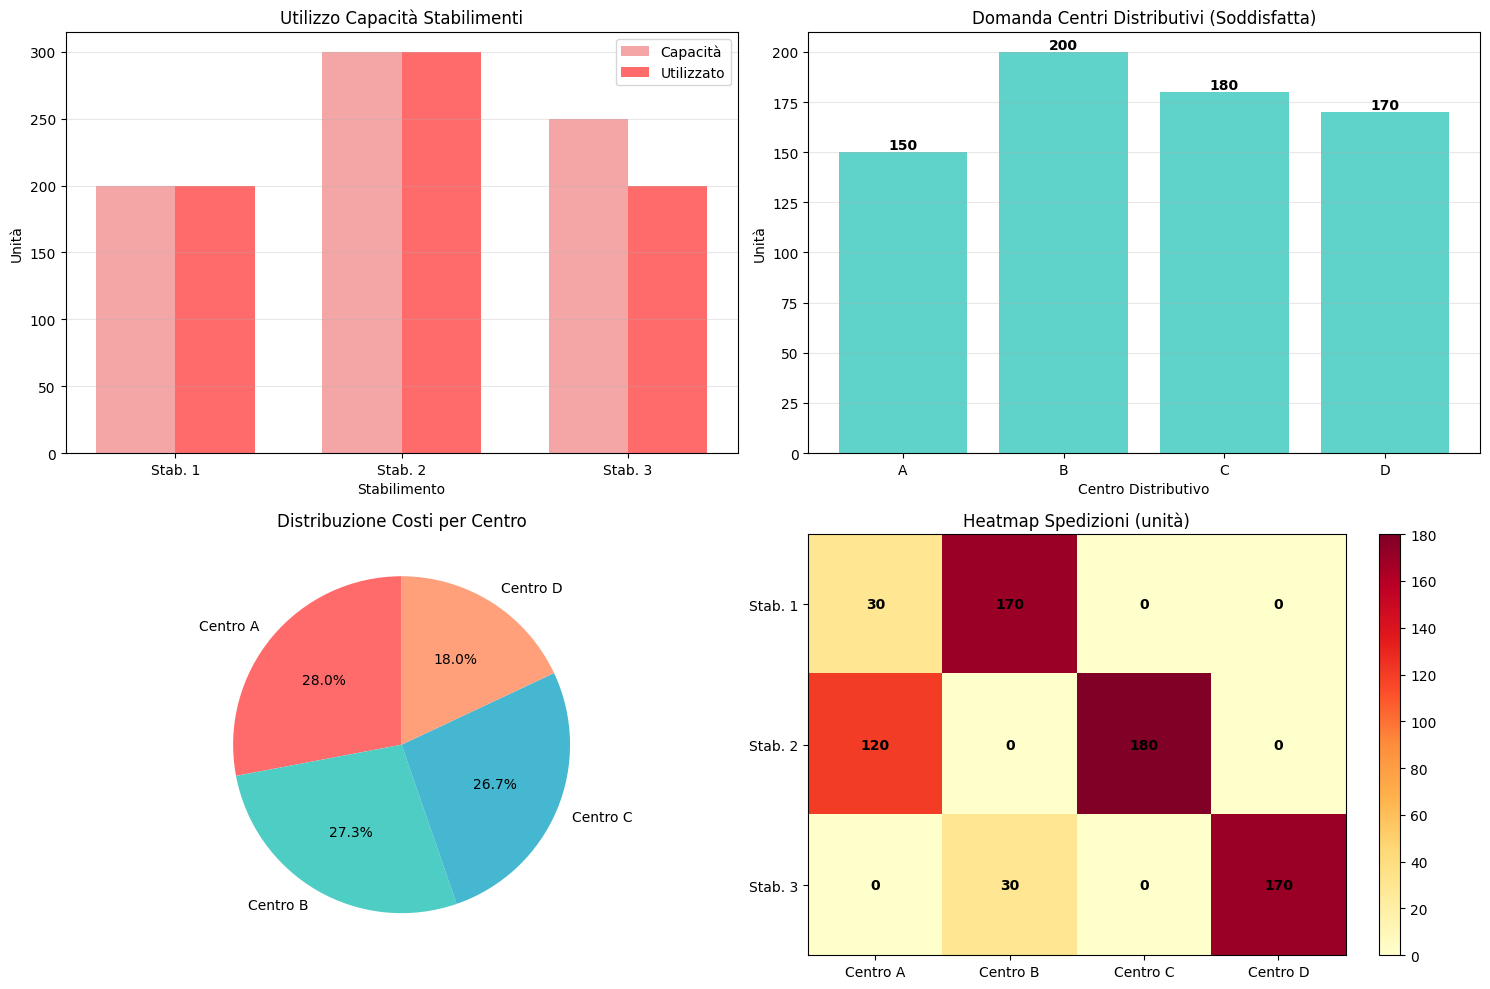

In [15]:
if modello.status == GRB.OPTIMAL:
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Grafico 1: Utilizzo capacit√† stabilimenti
    utilizzo_stab = [sum(soluzione[i, j] for j in centri) for i in stabilimenti]
    capacita_lista = [capacita[i] for i in stabilimenti]
    
    x_pos = np.arange(len(stabilimenti))
    width = 0.35
    
    axes[0, 0].bar(x_pos - width/2, capacita_lista, width, label='Capacit√†', color='lightcoral', alpha=0.7)
    axes[0, 0].bar(x_pos + width/2, utilizzo_stab, width, label='Utilizzato', color='#FF6B6B')
    axes[0, 0].set_xlabel('Stabilimento')
    axes[0, 0].set_ylabel('Unit√†')
    axes[0, 0].set_title('Utilizzo Capacit√† Stabilimenti')
    axes[0, 0].set_xticks(x_pos)
    axes[0, 0].set_xticklabels([f'Stab. {i}' for i in stabilimenti])
    axes[0, 0].legend()
    axes[0, 0].grid(axis='y', alpha=0.3)
    
    # Grafico 2: Domanda centri (sempre soddisfatta)
    domanda_lista = [domanda[j] for j in centri]
    ricevuto_lista = [sum(soluzione[i, j] for i in stabilimenti) for j in centri]
    
    axes[0, 1].bar(centri, domanda_lista, color='#4ECDC4', alpha=0.9)
    axes[0, 1].set_xlabel('Centro Distributivo')
    axes[0, 1].set_ylabel('Unit√†')
    axes[0, 1].set_title('Domanda Centri Distributivi (Soddisfatta)')
    axes[0, 1].grid(axis='y', alpha=0.3)
    
    # Aggiungi valori
    for i, (centro, val) in enumerate(zip(centri, domanda_lista)):
        axes[0, 1].text(i, val, f'{val:.0f}', ha='center', va='bottom', fontweight='bold')
    
    # Grafico 3: Distribuzione dei costi
    costi_per_centro = []
    for j in centri:
        costo_centro = sum(soluzione[i, j] * costo[i][j] for i in stabilimenti)
        costi_per_centro.append(costo_centro)
    
    axes[1, 0].pie(costi_per_centro, labels=[f'Centro {j}' for j in centri], 
                   autopct='%1.1f%%', startangle=90, colors=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'])
    axes[1, 0].set_title('Distribuzione Costi per Centro')
    
    # Grafico 4: Heatmap delle spedizioni
    spedizioni_matrix = np.array([[soluzione[i, j] for j in centri] for i in stabilimenti])
    
    im = axes[1, 1].imshow(spedizioni_matrix, cmap='YlOrRd', aspect='auto')
    axes[1, 1].set_xticks(np.arange(len(centri)))
    axes[1, 1].set_yticks(np.arange(len(stabilimenti)))
    axes[1, 1].set_xticklabels([f'Centro {j}' for j in centri])
    axes[1, 1].set_yticklabels([f'Stab. {i}' for i in stabilimenti])
    axes[1, 1].set_title('Heatmap Spedizioni (unit√†)')
    
    # Aggiungi valori nella heatmap
    for i in range(len(stabilimenti)):
        for j in range(len(centri)):
            text = axes[1, 1].text(j, i, f'{spedizioni_matrix[i, j]:.0f}',
                                  ha="center", va="center", color="black", fontweight='bold')
    
    plt.colorbar(im, ax=axes[1, 1])
    
    plt.tight_layout()
    plt.show()

## üß™ Esperimenti: Analisi What-If

### Esperimento 1: Aumento della domanda del Centro A (+20 unit√†)

In [17]:
# Salviamo il costo originale
costo_originale = costo_totale

# Modifichiamo la domanda del Centro A
vincoli_domanda['A'].RHS = 170  # da 150 a 170

# Risolviamo di nuovo
modello.optimize()

if modello.status == GRB.OPTIMAL:
    print("\n=== SCENARIO: Domanda Centro A = 170 unit√† ===")
    print(f"\nCosto originale: {costo_originale:,.2f} ‚Ç¨")
    print(f"Nuovo costo: {modello.ObjVal:,.2f} ‚Ç¨")
    print(f"Aumento costo: {modello.ObjVal - costo_originale:,.2f} ‚Ç¨ (+{((modello.ObjVal/costo_originale - 1)*100):.1f}%)")
    print(f"Costo marginale per unit√† aggiuntiva: {(modello.ObjVal - costo_originale)/20:.2f} ‚Ç¨/unit√†")
    
    print("\nNuove spedizioni verso Centro A:")
    for i in stabilimenti:
        if x[i, 'A'].X > 0.1:
            print(f"  Stabilimento {i}: {x[i, 'A'].X:.2f} unit√†")
elif modello.status == GRB.INFEASIBLE:
    print("\n‚ùå SOLUZIONE NON AMMISSIBILE!")
    print("La capacit√† totale non √® sufficiente per soddisfare la nuova domanda.")

# Ripristiniamo il valore originale
vincoli_domanda['A'].RHS = 150
modello.optimize()


=== SCENARIO: Domanda Centro A = 170 unit√† ===

Costo originale: 4,720.00 ‚Ç¨
Nuovo costo: 4,940.00 ‚Ç¨
Aumento costo: 220.00 ‚Ç¨ (+4.7%)
Costo marginale per unit√† aggiuntiva: 11.00 ‚Ç¨/unit√†

Nuove spedizioni verso Centro A:
  Stabilimento 1: 50.00 unit√†
  Stabilimento 2: 120.00 unit√†


### Esperimento 2: Riduzione del costo di trasporto Stab.3 ‚Üí Centro D

In [18]:
# Il costo Stab.3 ‚Üí Centro D passa da 5‚Ç¨ a 3‚Ç¨
costo_originale_3D = costo[3]['D']
costo[3]['D'] = 3

# Ridefinisco la funzione obiettivo
modello.setObjective(
    gp.quicksum(costo[i][j] * x[i, j] for i in stabilimenti for j in centri),
    GRB.MINIMIZE
)

# Risolvo
modello.optimize()

if modello.status == GRB.OPTIMAL:
    print("\n=== SCENARIO: Costo Stab.3‚ÜíCentro D = 3‚Ç¨/u (invece di 5‚Ç¨) ===")
    print(f"\nCosto originale: {costo_totale:,.2f} ‚Ç¨")
    print(f"Nuovo costo: {modello.ObjVal:,.2f} ‚Ç¨")
    print(f"Risparmio: {costo_totale - modello.ObjVal:,.2f} ‚Ç¨ (-{((1 - modello.ObjVal/costo_totale)*100):.1f}%)")
    
    print("\nCome cambia la spedizione verso Centro D:")
    for i in stabilimenti:
        if x[i, 'D'].X > 0.1:
            print(f"  Stabilimento {i}: {x[i, 'D'].X:.2f} unit√† (prima: {soluzione[i, 'D']:.2f})")

# Ripristino
costo[3]['D'] = costo_originale_3D
modello.setObjective(
    gp.quicksum(costo[i][j] * x[i, j] for i in stabilimenti for j in centri),
    GRB.MINIMIZE
)
modello.optimize()


=== SCENARIO: Costo Stab.3‚ÜíCentro D = 3‚Ç¨/u (invece di 5‚Ç¨) ===

Costo originale: 4,720.00 ‚Ç¨
Nuovo costo: 4,380.00 ‚Ç¨
Risparmio: 340.00 ‚Ç¨ (-7.2%)

Come cambia la spedizione verso Centro D:
  Stabilimento 3: 170.00 unit√† (prima: 170.00)


### Esperimento 3: Cosa succede se riduciamo la capacit√† dello Stabilimento 2?

In [19]:
# Riduciamo la capacit√† da 300 a 250
vincoli_capacita[2].RHS = 250

modello.optimize()

if modello.status == GRB.OPTIMAL:
    print("\n=== SCENARIO: Capacit√† Stab.2 = 250 unit√† (invece di 300) ===")
    print(f"\nCosto originale: {costo_totale:,.2f} ‚Ç¨")
    print(f"Nuovo costo: {modello.ObjVal:,.2f} ‚Ç¨")
    print(f"Aumento: {modello.ObjVal - costo_totale:,.2f} ‚Ç¨ (+{((modello.ObjVal/costo_totale - 1)*100):.1f}%)")
    
    print("\nCome si ridistribuisce il carico:")
    for i in stabilimenti:
        nuova_spedizione = sum(x[i, j].X for j in centri)
        vecchia_spedizione = sum(soluzione[i, j] for j in centri)
        print(f"  Stabilimento {i}: {nuova_spedizione:.2f} unit√† (prima: {vecchia_spedizione:.2f})")

# Ripristino
vincoli_capacita[2].RHS = 300
modello.optimize()


=== SCENARIO: Capacit√† Stab.2 = 250 unit√† (invece di 300) ===

Costo originale: 4,720.00 ‚Ç¨
Nuovo costo: 4,820.00 ‚Ç¨
Aumento: 100.00 ‚Ç¨ (+2.1%)

Come si ridistribuisce il carico:
  Stabilimento 1: 200.00 unit√† (prima: 200.00)
  Stabilimento 2: 250.00 unit√† (prima: 300.00)
  Stabilimento 3: 250.00 unit√† (prima: 200.00)


In [20]:
# Esportiamo il modello in formato leggibile
modello.write("rete_logistica.lp")
print("\n‚úÖ Modello esportato in 'rete_logistica.lp'")

# Esportiamo anche la soluzione
modello.write("rete_logistica_soluzione.sol")
print("‚úÖ Soluzione esportata in 'rete_logistica_soluzione.sol'")


‚úÖ Modello esportato in 'rete_logistica.lp'
‚úÖ Soluzione esportata in 'rete_logistica_soluzione.sol'
